# import python libraries

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to database

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

# Q1

In [5]:
sql_stat = """
        select * from gp17.student

"""

In [6]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,s_email,s_name,s_major
0,smithj@jmu.edu,John Smith,IA
1,johnsonq@jmu.edu,Quincy Johnson,IA
2,adamsj@jmu.edu,John Adams,IA
3,jacksona@jmu.edu,Andrew Jackson,IA
4,s10@jmu.edu,s6,ia


# Q2

In [14]:
sql_stat = """
        select gp17.professor.p_name,
            gp17.course.c_name
        from gp17.professor
        inner join gp17.course
        on gp17.professor.p_email = gp17.course.p_email
    
"""

In [15]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,p_name,c_name
0,Xeubin Wei,IA 101
1,Noel Hendrickson,IA 202
2,Orlandrew Danzell,IA 404
3,Darth Vader,IA 505
4,Darth Vader,IA 303


# Q3

In [18]:
sql_stat = """
        select count(c_number) as enrolled,
        c_number
        from gp17.enroll_list
        group by c_number
"""

<AxesSubplot:xlabel='c_number'>

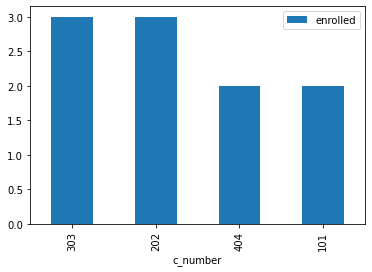

In [24]:
df = pandas.read_sql_query(sql_stat,conn)
df.plot.bar(x='c_number',y='enrolled')

# Q4

In [38]:
sql_stat = """
        select gp17.professor.p_name,
            count(gp17.course.c_name) as teaching_number
        from gp17.professor
        inner join gp17.course
        on gp17.professor.p_email = gp17.course.p_email
        group by professor.p_name
        order by teaching_number desc
"""

<AxesSubplot:xlabel='p_name'>

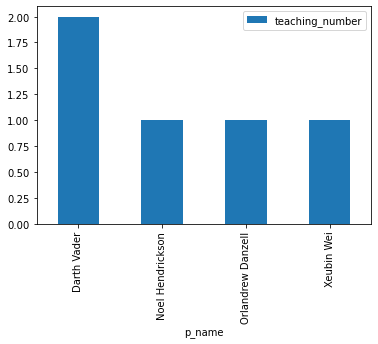

In [40]:
df = pandas.read_sql_query(sql_stat,conn)
df.plot.bar(x='p_name',y='teaching_number')

# Q5

In [53]:
sql_stat = """
        insert into gp17.professor(p_email,p_name,p_office)
        values ('revand@jmu.edu','Darth Revan','ISAT 206')
"""

In [56]:
df = pandas.read_sql_query("select * from gp17.professor",conn)
df[:]

,p_email,p_name,p_office
0,weix@jmu.edu,Xeubin Wei,ISAT 201
1,hendricksonn@jmu.edu,Noel Hendrickson,ISAT 203
2,danzello@jmu.edu,Orlandrew Danzell,ISAT 204
3,vaderd@dukes.jmu.edu,Darth Vader,ISAT 205
4,revand@jmu.edu,Darth Revan,ISAT 206


In [57]:
sql_stat = """
        insert into gp17.course(c_number,c_name,c_room,p_email)
        values('606','IA 606','ISAT 250','revand@jmu.edu')
"""

In [59]:
df = pandas.read_sql_query("select * from gp17.course",conn)
df[:]

,c_number,c_name,c_room,p_email
0,101,IA 101,ISAT 125,weix@jmu.edu
1,202,IA 202,ISAT 150,hendricksonn@jmu.edu
2,404,IA 404,ISAT 200,danzello@jmu.edu
3,505,IA 505,ISAt 225,vaderd@dukes.jmu.edu
4,303,IA 303,ISAT 175,vaderd@dukes.jmu.edu


# Q6

In [71]:
sql_stat = """
        update gp17.course
        set p_email = 'revand@jmu.edu'
        where c_number = '202'
"""

In [72]:
cur.execute(sql_stat)

In [73]:
conn.commit()

In [74]:
df = pandas.read_sql_query("select * from gp17.course",conn)
df[:]

,c_number,c_name,c_room,p_email
0,101,IA 101,ISAT 125,weix@jmu.edu
1,404,IA 404,ISAT 200,danzello@jmu.edu
2,505,IA 505,ISAt 225,vaderd@dukes.jmu.edu
3,303,IA 303,ISAT 175,vaderd@dukes.jmu.edu
4,202,IA 202,ISAT 150,revand@jmu.edu


In [75]:
sql_stat = """
        delete from gp17.professor
        where p_email = 'hendricksonn@jmu.edu'
"""

In [76]:
cur.execute(sql_stat)

In [77]:
conn.commit()

In [78]:
df = pandas.read_sql_query("select * from gp17.professor",conn)
df[:]

,p_email,p_name,p_office
0,weix@jmu.edu,Xeubin Wei,ISAT 201
1,danzello@jmu.edu,Orlandrew Danzell,ISAT 204
2,vaderd@dukes.jmu.edu,Darth Vader,ISAT 205
3,revand@jmu.edu,Darth Revan,ISAT 206


In [79]:
cur.close()

In [80]:
conn.close()